# Visualize TorNet Classifications

This notebook loads a pretrained keras model and tests it on TorNet samples

In [1]:
import os
os.environ['KERAS_BACKEND']='tensorflow' # set to 'tensorflow', 'torch' or 'jax' (installs required)

In [2]:
import sys
# Uncomment if tornet isn't installed in your environment or in your path already
#sys.path.append('../')  

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [3]:
from tornet.data.keras.loader import KerasDataLoader

In [68]:
# Download the pretrained model for inference from huggingface
from huggingface_hub import hf_hub_download
model_file = hf_hub_download(repo_id="tornet-ml/tornado_detector_baseline_v1", 
                             filename="tornado_detector_baseline.keras")

# Alternatively, you can manually download the .keras file and put in the ../models/ directory
# https://huggingface.co/tornet-ml/tornado_detector_baseline_v1
#model_file = '../models/tornado_detector_baseline.keras' 

# Load pretrained model
cnn = keras.models.load_model(model_file,compile=False)

## Run model on tornado samples

In [5]:
def classify_region(row):
    tornado_alley_bounds = {
    'lat_min': 32.0,
    'lat_max': 43.0,
    'lon_min': -102.0,
    'lon_max': -94.0
}

    dixie_alley_bounds = {
        'lat_min': 30.0,
        'lat_max': 38.0,
        'lon_min': -94.0,
        'lon_max': -83.0
    }
    if (
        tornado_alley_bounds['lat_min'] <= row['lat'] <= tornado_alley_bounds['lat_max'] and
        tornado_alley_bounds['lon_min'] <= row['lon'] <= tornado_alley_bounds['lon_max']
    ):
        return 2  # Tornado Alley
    elif (
        dixie_alley_bounds['lat_min'] <= row['lat'] <= dixie_alley_bounds['lat_max'] and
        dixie_alley_bounds['lon_min'] <= row['lon'] <= dixie_alley_bounds['lon_max']
    ):
        return 1  # Dixie Alley
    else:
        return 0  # None

In [43]:
# Create test samples
# Load full catalog and select EF 3+ tornadoes
data_root= 'C:/Users/mjhig/tornet_2013'

catalog_path = os.path.join(data_root,'catalog.csv')
if not os.path.exists(catalog_path):
    raise RuntimeError('Unable to find catalog.csv at '+data_root)
        
catalog = pd.read_csv(catalog_path,parse_dates=['start_time','end_time'])
#catalog['region'] = catalog.apply(classify_region, axis=1)

In [44]:

catalog=catalog[catalog.ef_number >= 0]
from collections import Counter
catalog = catalog[(catalog.start_time.dt.year >= 2013) & (catalog.start_time.dt.year <= 2018)]
print(Counter(catalog.ef_number))



print(catalog.head())


# catalog= catalog[catalog.region == 1] # Tornado Alley is 2 1 is dixie

# ds_test = KerasDataLoader(data_root=data_root,
#                          data_type='test',
#                          catalog=catalog,
#                          batch_size = 4, 
#                          workers = 4,
#                          use_multiprocessing = True)
# from tornet.display.display import plot_radar
# vars_to_plot = ['DBZ', 'ZDR', 'KDP', 'RHOHV', 'VEL', 'WIDTH']
# d={0:"Neither",1:"Dixie Alley",2:"Tornado Alley"}
# for x, y in ds_test:
#     xin = {k: x[k] for k in cnn.input}  # Limit to only expected inputs
#     p = cnn.predict(xin, verbose=0)  # This outputs a logit
#     p = 1 / (1 + np.exp(-p))  # Apply sigmoid to map to [0,1]
    
#     for didx in range(x['DBZ'].shape[0]):  # Assuming 'DBZ' has shape [batch_size, ...]
#         fig = plt.figure(figsize=(12, 6), edgecolor='k')
#         plot_radar(x, fig=fig, channels=vars_to_plot, include_cbar=True, time_idx=didx, n_rows=2, n_cols=3)
#         fig.text(.5, .05, 'ID: %s | Tornado Likelihood: %.2f | EF Number: %.0f | Region: %s' % (
#                 catalog.iloc[didx].event_id, p[didx, 0], catalog.iloc[didx].ef_number, d[catalog.iloc[didx].region]), ha='center')
#         plt.show()  # Add this line to display the figure


Counter({1: 3194, 0: 3179, 2: 1144, 3: 377, 4: 97})
       type          start_time            end_time        lat         lon  \
2548  train 2013-09-01 22:11:00 2013-09-01 22:26:00  42.331776  -72.335821   
2549  train 2013-09-11 19:31:00 2013-09-11 19:46:00  46.505395  -69.028873   
2550  train 2013-09-17 20:30:00 2013-09-17 20:45:00  44.137829 -112.156897   
2551  train 2013-09-17 20:30:00 2013-09-17 20:45:00  44.240399 -111.906142   
2552  train 2013-09-17 20:35:00 2013-09-17 20:50:00  44.137829 -112.156897   

      episode_id  event_id site_name  ef_number category  az_min  az_max  \
2548       77453    469573      KBOX          0      TOR     263     323   
2549       79080    475125      KCBW          0      TOR     269     329   
2550       79786    478282      KSFX          0      TOR     -10      50   
2551       79786    478283      KSFX          0      TOR      -4      56   
2552       79786    478282      KSFX          0      TOR     -10      50   

      rng_min  rng_max

In [ ]:
region_counts = Counter(catalog['region'])


total_regions = len(catalog)

# Calculate percentage for each region
region_percentages = {region: (count / total_regions) * 100 for region, count in region_counts.items()}

# Print or return the region percentages
print(region_percentages)


#EF4+{0: 12.371134020618557,1: 29.896907216494846, 2: 57.73195876288659 }
#EF3+{0: 30.801687763713083, 1: 28.691983122362867, 2: 40.50632911392405}
#EF2+{0: 43.325092707045734, 1: 28.80098887515451, 2: 27.873918417799754}

{0: 12.371134020618557, 2: 57.73195876288659, 1: 29.896907216494846}


In [9]:
tornado_alley_bounds = {
    'lat_min': 32.0,
    'lat_max': 43.0,
    'lon_min': -102.0,
    'lon_max': -94.0
}

dixie_alley_bounds = {
    'lat_min': 30.0,
    'lat_max': 38.0,
    'lon_min': -94.0,
    'lon_max': -83.0
}


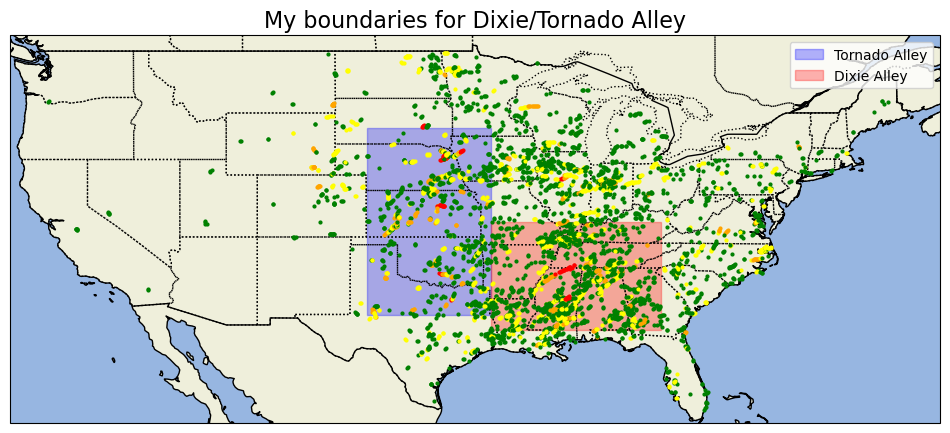

In [29]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches

# Define boundaries for Tornado Alley and Dixie Alley
tornado_alley_bounds = {
    'lat_min': 32.0,
    'lat_max': 44.0,
    'lon_min': -102.0,
    'lon_max': -94.0
}

dixie_alley_bounds = {
    'lat_min': 31.0,
    'lat_max': 38.0,
    'lon_min': -94.0,
    'lon_max': -83.0
}

# Coordinates of the costliest tornado disasters
# costliest_tornado_data = [
#     {"coords": (-94.5133, 37.0842), "label": "May 22, 2011"},  # Joplin, MO
#     {"coords": (-97.4867, 35.3395), "label": "May 20, 2013"},  # Moore, OK
#     {"coords": (-87.5692, 33.2098), "label": "Apr 27, 2011"},  # Tuscaloosa–Birmingham, AL
#     {"coords": (-96.0112, 41.2565), "label": "May 6, 1975"},   # Omaha, NE
#     {"coords": (-95.6771, 39.0558), "label": "Jun 8, 1966"},   # Topeka, KS
#     {"coords": (-101.8552, 33.5779), "label": "May 11, 1970"}, # Lubbock, TX
#     {"coords": (-83.9296, 39.6848), "label": "Apr 3, 1974"},   # Xenia, OH
#     {"coords": (-98.4934, 33.9137), "label": "Apr 10, 1979"},  # Wichita Falls, TX
#     {"coords": (-88.9331, 37.7306), "label": "May 29, 1982"},  # Marion, IL
#     {"coords": (-97.5164, 35.4676), "label": "May 3, 1999"},   # Oklahoma City, OK
#     {"coords": (-96.7969, 32.7767), "label": "Oct 20, 2019"},  # North Dallas, TX
#     {"coords": (-86.7816, 36.1627), "label": "Mar 3, 2020"},   # Nashville, TN
#     {"coords": (-87.8289, 34.2734), "label": "Apr 27, 2011"},  # Hackleburg–Phil Campbell, AL
#     {"coords": (-90.1994, 38.6270), "label": "May 27, 1896"},  # St. Louis, MO
#     {"coords": (-83.6923, 43.0125), "label": "Jun 8, 1953"},   # Flint, MI
#     {"coords": (-89.8628, 31.1723), "label": "Apr 24, 1908"},  # Amite, LA–Purvis, MS
#     {"coords": (-92.5360, 45.1233), "label": "Jun 12, 1899"},  # New Richmond, WI
#     {"coords": (-83.8241, 34.2979), "label": "Apr 6, 1936"},   # Gainesville, GA
#     {"coords": (-99.3976, 36.4361), "label": "Apr 9, 1947"},   # Woodward, OK
#     {"coords": (-89.3985, 37.7273), "label": "Mar 18, 1925"}   # Tri-State (MO/IL/IN)
# ]





# Create a map
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Add a background map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')

# Add Tornado Alley rectangle
ax.add_patch(mpatches.Rectangle(
    (tornado_alley_bounds['lon_min'], tornado_alley_bounds['lat_min']),
    tornado_alley_bounds['lon_max'] - tornado_alley_bounds['lon_min'],
    tornado_alley_bounds['lat_max'] - tornado_alley_bounds['lat_min'],
    transform=ccrs.PlateCarree(),
    color='blue',
    alpha=0.3,
    label='Tornado Alley'
))

# Add Dixie Alley rectangle
ax.add_patch(mpatches.Rectangle(
    (dixie_alley_bounds['lon_min'], dixie_alley_bounds['lat_min']),
    dixie_alley_bounds['lon_max'] - dixie_alley_bounds['lon_min'],
    dixie_alley_bounds['lat_max'] - dixie_alley_bounds['lat_min'],
    transform=ccrs.PlateCarree(),
    color='red',
    alpha=0.3,
    label='Dixie Alley'
))

# # Add points and labels for the costliest tornado disasters

# Define a color mapping for ef_number
color_map = {
    0: 'gray',
    1: 'green',
    2: 'yellow',
    3: 'orange',
    4: 'red',
    5: 'pink'  # For ef_number >= 5
}

# Iterate over each row in the DataFrame using iterrows
for index, tornado in catalog.iterrows():
    
    # Convert ef_number to an integer
    ef_number = int(tornado["ef_number"])
    
    # Get the color from the color_map dictionary, defaulting to 'darkred' if ef_number >= 5
    color = color_map.get(ef_number, 'darkred')
    
    ax.plot(tornado["lon"], tornado["lat"], marker='o', color=color, markersize=2, transform=ccrs.PlateCarree())
    # ax.text(lon + 0.5, lat, label, fontsize=8, transform=ccrs.PlateCarree())

# Customize the map
ax.set_title("My boundaries for Dixie/Tornado Alley", fontsize=16)
ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())  # Set map extent
ax.legend(loc='upper right')

# Show the map
plt.show()

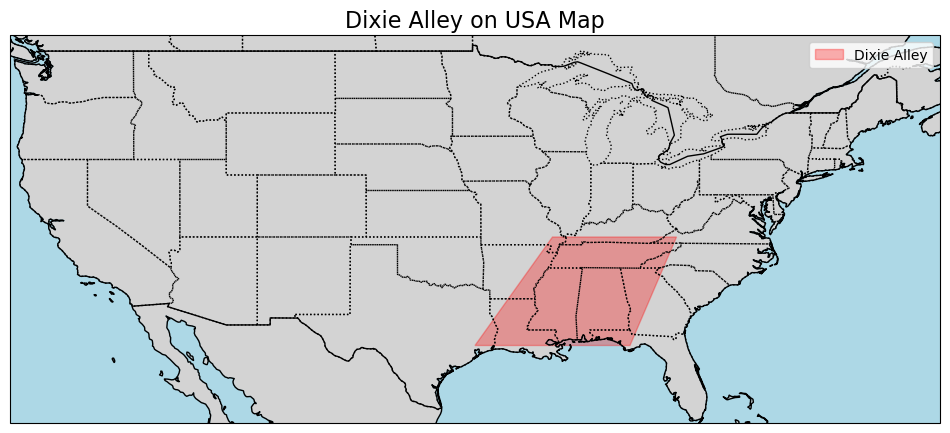

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Polygon
from cartopy.io.shapereader import Reader

# Define coordinates for Dixie Alley polygon
dixie_alley_coords = [
    [-95, 30],  # Bottom-left
    [-85, 30],  # Bottom-right
    [-82, 37],  # Top-right
    [-90, 37],  # Top-left
    [-95, 30]   # Closing the loop
]

# Create a map
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Add a background map
ax.add_feature(cfeature.LAND, color="lightgray")
ax.add_feature(cfeature.OCEAN, color="lightblue")
ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')

# Add Dixie Alley polygon
polygon = Polygon(dixie_alley_coords, closed=True, transform=ccrs.PlateCarree(), color='red', alpha=0.3, label="Dixie Alley")
ax.add_patch(polygon)

# Customize the map
ax.set_title("Dixie Alley on USA Map", fontsize=16)
ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())  # Set map extent
ax.legend(loc='upper right')

# Show the map
plt.show()


## Run model on non-tornado samples

In [73]:
# Load full catalog and select EF 3+ tornadoes
data_root= 'C:/Users/mjhig/tornet_2013'

catalog_path = os.path.join(data_root,'catalog.csv')
if not os.path.exists(catalog_path):
    raise RuntimeError('Unable to find catalog.csv at '+data_root)
        
catalog = pd.read_csv(catalog_path,parse_dates=['start_time','end_time'])
catalog=catalog[catalog.ef_number>=3] # non tornadoes only

ds_test = KerasDataLoader(data_root=data_root,
                         data_type='test',
                         random_state=1234,
                         catalog=catalog,
                         batch_size = 4, 
                         workers = 4,
                         use_multiprocessing = True)

In [ ]:
# grab a batch and run through model
for x,y in ds_test:
    xin = {k:x[k] for k in cnn.input} # limit to only expected inputs
    p=cnn.predict(xin,verbose=0) # this outputs a logit
    p = 1/(1+np.exp(-p)) # apply sigmoid to map to [0,1]
    break


: 

In [ ]:
# Visualize samples along with model likelihood
from tornet.display.display import plot_radar
vars_to_plot=['DBZ']

for didx in range(4):
    fig = plt.figure(figsize=(12,6),edgecolor='k')
    plot_radar(x,
               fig=fig,
               channels=vars_to_plot,
               include_cbar=True,
               time_idx=didx, 
               n_rows=2, n_cols=3)

    fig.text(.5, .05, 'Tornado Likelihood: %.2f' % p[didx,0] , ha='center');
    

NameError: name 'x' is not defined

<Figure size 1200x600 with 0 Axes>